In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

## Contours and their detection
Contours are nothing but continuous shapes/polygons in an image. It can be describe as a curve joining a set of continuous points along a boundary, having same color or intensity. Contours are useful in shape analysis and detecting objects in an image.

### Find Contours
Function: <b>cv2.findContours(image, contour_retrieval_mode, contour_approximation_method)</b>

In [274]:
# finding contours
image = cv2.imread("./resources/messi.jpg")
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

ret, thresh = cv2.threshold(gray, 127, 255, 0)

contours, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
# each contour is (x, y) representing coordinates of boundary points

### Draw Contours
Function: <b>cv2.drawContours(image, contours, index_of_contour (-1 for drawing all), color, thickness)</b>

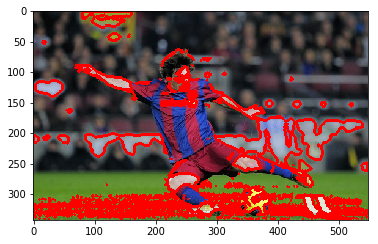

In [275]:
cv2.drawContours(image, contours, -1, (0, 0, 255), 3)

plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.show()

### Different Contour Approximation Methods
1. <u>cv2.CHAIN_APPROX_NONE</u> - Returns all boundary points
2. <u>cv2.CHAIN_APPROX_SIMPLE</u> - Removes redundant boundary points

In [276]:
image = cv2.imread('./resources/image.png')
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

contours1, hierarchy = cv2.findContours(gray, cv2.RETR_TREE, cv2.CHAIN_APPROX_NONE)
contours2, hierarchy = cv2.findContours(gray, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

print len(contours1[0]), len(contours2[0])

406 4


## Image Moment
A certain particular weighted average(moment) of the image pixels' intensities. Useful to find area of object, centre of mass of object etc.

Function: <b>cv2.moments(contour)</b>

In [277]:
# symmetrical image => theoritical centroid
print "Theoritical centroid: ", (image.shape[1]/2, image.shape[0]/2)

contour = contours2[0]
moment = cv2.moments(contour)
# print moment

# centroid => c_x = M10/M00, c_y = M01/M00
centroid = moment['m10']/moment['m00'], moment['m01']/moment['m00']
print "Calculated centroid: ", centroid
print

# M00 => area
print "Area from contour coordinates: ", cv2.contourArea(contour)
print "Area from image moment: ", moment['m00']

Theoritical centroid:  (100, 107)
Calculated centroid:  (99.5, 107.0)

Area from contour coordinates:  10282.0
Area from image moment:  10282.0


$$\bar{x}\text{ and }\bar{y}\text{ are components of centroid}$$

### 1<sup>st</sup> order central moments
$$\mu_{00} = M_{00}$$
$$\mu_{01} = 0$$
$$\mu_{10} = 0$$

### 2<sup>nd</sup> order central moments
$$\mu_{11} = M_{11} - \bar{x}M_{01} = M_{11} - \bar{y}M_{10}$$
$$\mu_{20} = M_{20} - \bar{x}M_{10}$$
$$\mu_{02} = M_{02} - \bar{y}M_{01}$$

## Image Orientation
$$\mu_{20}' = \mu_{20}/\mu_{00} = M_{20}/M_{00} - \bar{x}^2$$
$$\mu_{02}' = \mu_{02}/\mu_{00} = M_{02}/M_{00} - \bar{y}^2$$
$$\mu_{11}' = \mu_{11}/\mu_{00} = M_{11}/M_{00} - \bar{x}\bar{y}$$

<b><u>Covariance matrix</u></b>

$$\text{cov[ I(x,y) ]} = \begin{bmatrix}\mu_{20}' & \mu_{11}' \\ \mu_{11}' & \mu_{02}'\end{bmatrix}$$

Eigenvectors of covariance matrix correspond to major and minor axis of image intensity.
$$\theta = \frac{1}{2}\arctan{\frac{2\mu_{11}'}{\mu_{20}' - \mu_{02}'}}$$

In [278]:
u20 = moment['m20']/moment['m00'] - centroid[0]**2
u02 = moment['m02']/moment['m00'] - centroid[1]**2
u11 = moment['m11']/moment['m00'] - centroid[0] * centroid[1]

import math
theta = 0.5 * math.atan((2 * u11) / (u20 - u02))
print theta

-0.0


In [279]:
# perimeter of contour
perimeter_closed = cv2.arcLength(contour, True)
perimeter_open = cv2.arcLength(contour, False)

print perimeter_closed, perimeter_open

406.0 309.0


### Contour Approximation
It approximates a contour shape to another shape with less number of vertices. It uses Douglas-Peucker algorithm.
<img src="./resources/algo.png">

Function: <b>cv2.approxPolyDP(contour, epsilon, True (for closed curve))</b>

<u>epsilon</u> is the measure of accuracy, maximum distance from contour to approximated contour.

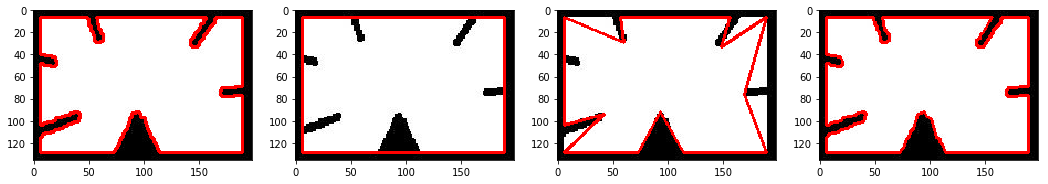

In [280]:
image = cv2.imread('./resources/contour.png')
image2 = np.copy(image)
image3 = np.copy(image)
image4 = np.copy(image)

ret, thresh = cv2.threshold(cv2.cvtColor(image, cv2.COLOR_BGR2GRAY), 180, 255, 0)
contours, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
contour = max(contours, key=cv2.contourArea)
cv2.drawContours(image, [contour], 0, (255, 0, 0), 2)

epsilon = 0.05 * cv2.arcLength(contour, True)
approx = cv2.approxPolyDP(contour, epsilon, True)
cv2.drawContours(image2, [approx], 0, (255, 0, 0), 2)

epsilon = 0.02 * cv2.arcLength(contour, True)
approx = cv2.approxPolyDP(contour, epsilon, True)
cv2.drawContours(image3, [approx], 0, (255, 0, 0), 2)

epsilon = 0.001 * cv2.arcLength(contour, True)
approx = cv2.approxPolyDP(contour, epsilon, True)
cv2.drawContours(image4, [approx], 0, (255, 0, 0), 2)

fig = plt.figure()
fig.set_size_inches(18, 10)

fig.add_subplot(1, 4, 1)
plt.imshow(image)

fig.add_subplot(1, 4, 2)
plt.imshow(image2)

fig.add_subplot(1, 4, 3)
plt.imshow(image3)

fig.add_subplot(1, 4, 4)
plt.imshow(image4)

plt.show()

In [281]:
image = cv2.imread('./resources/hand.jpg')
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

ret, thresh = cv2.threshold(gray, 200, 255, cv2.THRESH_BINARY_INV)

contours, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
contour = max(contours, key=cv2.contourArea)
# cv2.drawContours(image, [contour], 0, (0, 255, 0), 3)

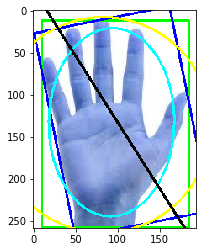

In [282]:
image = cv2.imread('./resources/hand.jpg')

# Bounding contours

# 1. Straight Rectangle
x, y, w, h = cv2.boundingRect(contour)
cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)

# 2. Rotated Rectangle
rect = cv2.minAreaRect(contour)  # returns top-left (x,y), (width, height), angle of rotation
box = np.int0(cv2.cv.BoxPoints(rect))
cv2.drawContours(image, [box], 0, (0, 0, 255), 2)

# 3. Enclosing Circle
(x, y), radius = cv2.minEnclosingCircle(contour)
center = int(x), int(y)
radius = int(radius)
cv2.circle(image, center, radius, (255, 255, 0), 2)

# 4. Fitting Ellipse
ellipse = cv2.fitEllipse(contour)
cv2.ellipse(image, ellipse, (0, 255, 255), 2)

# 5. Fitting Line
rows, cols = image.shape[:2]
[vx, vy, x, y] = cv2.fitLine(contour, cv2.cv.CV_DIST_L2, 0, 0.01, 0.01)  # returns normalized vectors vx, vy
lefty = int((-x * vy / vx) + y)
righty = int(((cols - x) * vy / vx) + y)
cv2.line(image, (cols - 1, righty), (0, lefty), (0, 0, 0), 2)

plt.imshow(image)
plt.show()

### Basic Contour Properties
$$\text{Aspect Ratio} = \frac{\text{Width of bounding Rect}}{\text{Height of bounding Rect}}$$

$$Extent = \frac{\text{Object Area}}{\text{Bounding Rectangle Area}}$$

$$Solidity = \frac{\text{Contour Area}}{\text{Convex Hull Area}}$$

$$\text{Equivalent Diameter} = \sqrt{\frac{4 * \text{Contour Area}}{\pi}}$$

Orientation:  1.12699019909


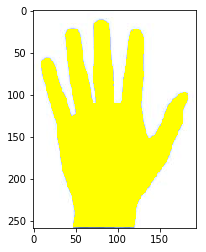

In [283]:
(x, y), (major_axis, minor_axis), angle = cv2.fitEllipse(contour)
print "Orientation: ", angle

# highlight object
mask = np.zeros(gray.shape, np.uint8)
cv2.drawContours(mask, [contour], 0, 255, -1)
pixels = cv2.findNonZero(mask)
image = cv2.imread('./resources/hand.jpg')
cv2.drawContours(image, pixels, -1, (255, 255, 0), 0)
plt.imshow(image)
plt.show()

### Convex Hull and Defects
Convex hull is a convex/bulged out envelope of a set of <b>X</b> points in space. Convexity Defects are deviation of the object from the convex hull.

Function: <b>cv2.convexHull(points[, hull[, clockwise[, returnPoints])</b>
- points - contours
- hull - output
- clockwise - Orientation flag. True => clockwise output convex hull
- returnPoints - By default True. True => return coordinates of hull points, False => return indices of corresponding contour points

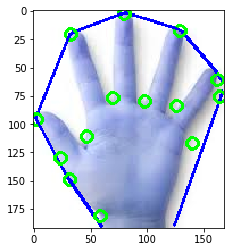

In [284]:
image = cv2.imread('./resources/hand2.jpg')
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

ret, thresh = cv2.threshold(gray, 230, 250, cv2.THRESH_BINARY_INV)

contours, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
contour = contours[0]

# hull = cv2.convexHull(contour)
# cv2.drawContours(image, [hull], 0, (255, 0, 0), 3)

defects = cv2.convexityDefects(contour, cv2.convexHull(contour, returnPoints=False))
for i in range(defects.shape[0]):
    s, e, f, d = defects[i][0]  # start point, end point, farthest point, distance to farthest point
    start = tuple(contour[s][0])
    end = tuple(contour[e][0])
    far = tuple(contour[f][0])
    cv2.line(image, start, end, (0, 0, 255), 2)
    cv2.circle(image, far, 5, (0, 255, 0), 2)

plt.imshow(image)
plt.show()

# check for convexity
# print cv2.isContourConvex(contour)
# print cv2.isContourConvex(hull)

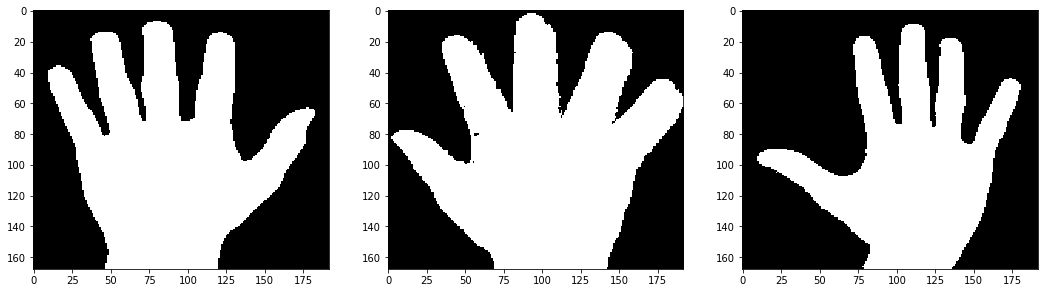

Distance between 1 & 2:  0.137606623134
Distance between 1 & 3:  0.167608672102
Distance between 2 & 3:  0.294584486145


In [285]:
# shape matching
image1 = cv2.imread('./resources/hand.jpg', cv2.IMREAD_GRAYSCALE)
image2 = cv2.imread('./resources/hand2.jpg', cv2.IMREAD_GRAYSCALE)
image3 = cv2.imread('./resources/hand3.jpeg', cv2.IMREAD_GRAYSCALE)

min_width = min(image1.shape[0], min(image2.shape[0], image3.shape[0]))
min_height = min(image1.shape[1], min(image2.shape[1], image3.shape[1]))

image1 = cv2.resize(image1, (min_width, min_height))
image2 = cv2.resize(image2, (min_width, min_height))
image3 = cv2.resize(image3, (min_width, min_height))

ret, thresh1 = cv2.threshold(image1, 230, 255, cv2.THRESH_BINARY_INV)
ret, thresh2 = cv2.threshold(image2, 232, 255, cv2.THRESH_BINARY_INV)
ret, thresh3 = cv2.threshold(image3, 245, 255, cv2.THRESH_BINARY_INV)

fig = plt.figure()
fig.set_size_inches(18, 10)
fig.add_subplot(1, 3, 1)
plt.imshow(thresh1, cmap='gray')
fig.add_subplot(1, 3, 2)
plt.imshow(thresh2, cmap='gray')
fig.add_subplot(1, 3, 3)
plt.imshow(thresh3, cmap='gray')
plt.show()

contours, hierarchy = cv2.findContours(thresh1, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
contour1 = contours[0]
contours, hierarchy = cv2.findContours(thresh2, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
contour2 = contours[0]
contours, hierarchy = cv2.findContours(thresh3, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
contour3 = max(contours, key=cv2.contourArea)

cv2.drawContours(image1, [contour1], 0, 0, 2)
cv2.drawContours(image2, [contour2], 0, 0, 2)
cv2.drawContours(image3, [contour3], 0, 0, 2)

print "Distance between 1 & 2: ", cv2.matchShapes(contour1, contour2, 1, 0.0)
print "Distance between 1 & 3: ", cv2.matchShapes(contour1, contour3, 1, 0.0)
print "Distance between 2 & 3: ", cv2.matchShapes(contour2, contour3, 1, 0.0)

### Hierarchy
It's a representation of relationship between different contours within an image. Each countour can be a parent or can have child contours. Hierarchy returns a 4-value array for every contour [Next, Previous, First_Child, Parent].

<b><u>Contour Retrieval Modes</u></b>
1. <u>cv2.RETR_LIST</u> - All contours belong to same hierarchy level. Retrieves all the contours.
2. <u>cv2.RETR_EXTERNAL</u> - All child contours are left behind. Retrieves the extreme outer contours(eldest contour in every level).
3. <u>RETR_CCOMP</u> - Retrieves all contours, arranging them to a 2-level hierarchy. External contours of object are place in hierarchy-1 and contours of holes inside object in hieracrchy-2. If any object inside it, its contour is stored in hierarchy-1 and its hole in hierarchy-2 and so on.
4. <u>RETR_TREE</u> - Retrieves all contours and creates a full family hierarchy list.

<img src="./resources/hierarchy.png">

In [297]:
image = cv2.imread("./resources/hierarchy.png", cv2.IMREAD_GRAYSCALE)
ret, image = cv2.threshold(image, 120, 255, cv2.THRESH_BINARY)

image1 = np.copy(image)
image2 = np.copy(image)
image3 = np.copy(image)
image4 = np.copy(image)

contours, hierarchy1 = cv2.findContours(image1, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)
contours, hierarchy2 = cv2.findContours(image1, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
contours, hierarchy3 = cv2.findContours(image1, cv2.RETR_CCOMP, cv2.CHAIN_APPROX_SIMPLE)
contours, hierarchy4 = cv2.findContours(image1, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

print len(contours)
print

print hierarchy1
print
print hierarchy2
print
print hierarchy3
print
print hierarchy4

8

[[[ 1 -1 -1 -1]
  [ 2  0 -1 -1]
  [ 3  1 -1 -1]
  [ 4  2 -1 -1]
  [ 5  3 -1 -1]
  [ 6  4 -1 -1]
  [ 7  5 -1 -1]
  [-1  6 -1 -1]]]

[[[ 1 -1 -1 -1]
  [ 2  0 -1 -1]
  [-1  1 -1 -1]]]

[[[ 1 -1 -1 -1]
  [ 2  0 -1 -1]
  [ 4  1  3 -1]
  [-1 -1 -1  2]
  [ 6  2  5 -1]
  [-1 -1 -1  4]
  [ 7  4 -1 -1]
  [-1  6 -1 -1]]]

[[[ 6 -1  1 -1]
  [-1 -1  2  0]
  [-1 -1  3  1]
  [-1 -1  4  2]
  [ 5 -1 -1  3]
  [-1  4 -1  3]
  [ 7  0 -1 -1]
  [-1  6 -1 -1]]]
